In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# characteristics:
# ---------------
# predictor: normal + some right skew
#          : have quite similar scale

# targets: left skew [protein, water], right skew [fat]

# preprocessing:
# -------------
# 
# standard scaler 

# resampling method:
# -----------------
# train:test = 80:20
# cv = 5 repeated 10-fold cv

# metric:
# ------
# - rmse

# models: [target=protein]
# ------
# - PLS
# - PCR
# - Ridge
# - LinearRegression
# - Lasso
# - ElasticNet

In [19]:
absorp = pd.read_csv('data/tecator/absorp.csv', index_col=0, prefix='F_', header=None, skiprows=1)
endpoints = pd.read_csv('data/tecator/endpoints.csv', index_col=0, 
                header=None, names=['water', 'fat', 'protein'],
                skiprows=1)

In [20]:
absorp.shape, endpoints.shape

((215, 100), (215, 3))

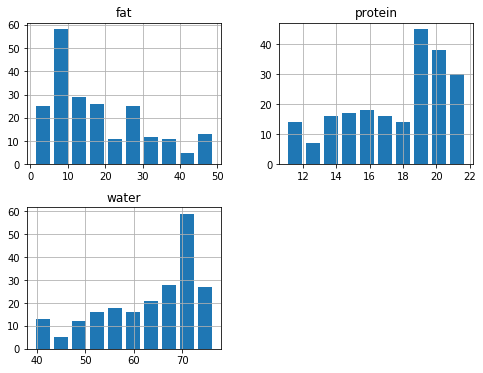

In [33]:
axs = endpoints.hist(rwidth=.8, figsize=(8, 6))

In [23]:
pca = PCA().fit(absorp)

Text(0,0.5,'explained variance')

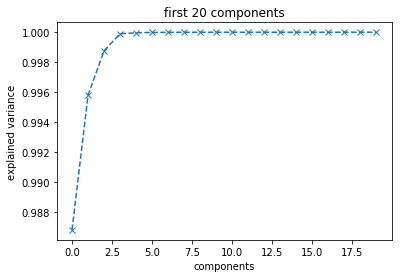

In [31]:
plt.plot(pca.explained_variance_ratio_.cumsum()[:20] ,'x--')
plt.title('first 20 components')
plt.xlabel('components')
plt.ylabel('explained variance')

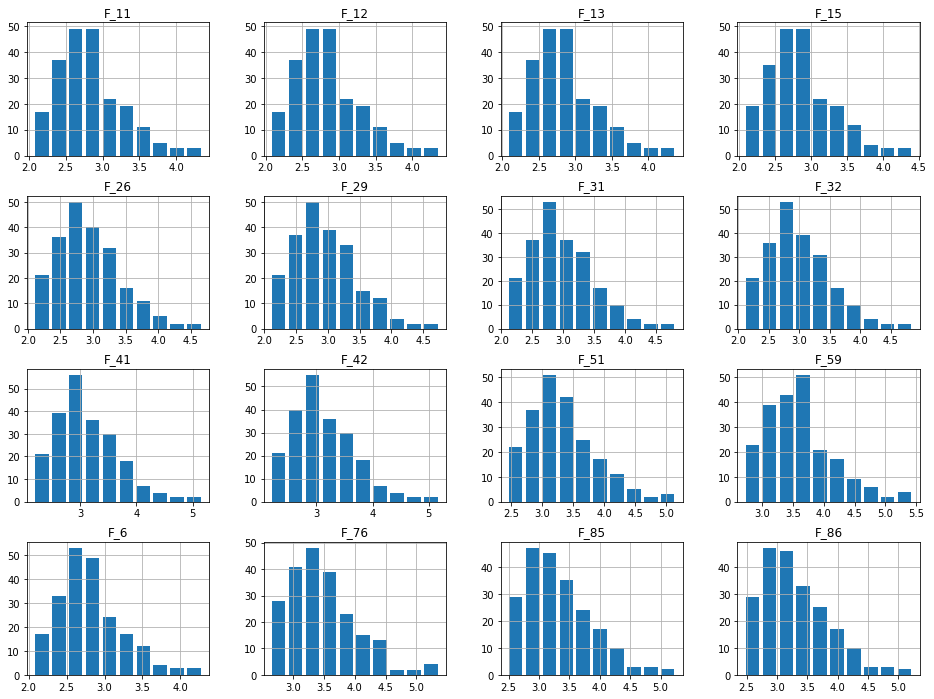

In [37]:
axs = absorp.sample(n=16, axis=1).hist(rwidth=.8, figsize=(16, 12), layout=(4,4))

In [38]:
absorp.describe().T

,count,mean,std,min,25%,50%,75%,max
F_1,215.0,2.808561,0.410793,2.06642,2.512265,2.75360,3.006155,4.23728
F_2,215.0,2.811137,0.413352,2.06583,2.513260,2.75518,3.010470,4.24721
F_3,215.0,2.813727,0.415906,2.06518,2.514210,2.75668,3.014840,4.25737
F_4,215.0,2.816363,0.418465,2.06465,2.515330,2.75824,3.019260,4.26773
F_5,215.0,2.819098,0.421040,2.06417,2.516775,2.75986,3.025895,4.27847
F_6,215.0,2.821983,0.423635,2.06373,2.518240,2.76161,3.032780,4.28968
F_7,215.0,2.825064,0.426245,2.06340,2.518305,2.76355,3.039780,4.30133
F_8,215.0,2.828375,0.428866,2.06314,2.518605,2.76568,3.046930,4.31331
F_9,215.0,2.831943,0.431510,2.06301,2.519185,2.76866,3.054310,4.32587
F_10,215.0,2.835813,0.434195,2.06317,2.521480,2.77072,3.061875,4.33927


#### Splitting dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(absorp, endpoints, 
                                                    test_size=.2, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 100), (43, 100), (172, 3), (43, 3))

In [64]:
# target = protein
protein_train = y_train['protein']
pretein_test = y_test['protein']

In [43]:
# cv method
k10 = RepeatedKFold(random_state=42)

#### Preprocessing

In [54]:
# boxcox + scaling
bx_std = PowerTransformer(method='box-cox')

# only scaling
std = StandardScaler()



#### Modeling

In [116]:
# run_model(estimator, params=None)
# run grid_search, print result and plot residual
# return grid
def run_model(estimator, X, y, params=None, cv=5):
    'test_neg_mean_squared_error'
    if params is None:
        # no tuning hyperparameters
        results = cross_validate(estimator, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=4, 
                                 return_estimator=True, return_train_score=False)
        print(results.keys())
        model = results['estimator'][0]
        best_params = None
        best_rmse = np.sqrt(-results['test_score']).mean()
    else:
        # tuning hyperparameters using Grid search
        model = GridSearchCV(estimator, params, cv=cv, scoring='neg_mean_squared_error', 
                            verbose=1, return_train_score=False, n_jobs=4)
        model.fit(X, y)
        best_rmse = np.sqrt(-model.best_score_)
        best_params = model.best_params_
    
    y_pred = model.predict(X).ravel()
    
    
    print("best rmse: {:.3f}".format(best_rmse))
    print("the best params: \n{}".format(best_params))
    
    plot_regress(y, y_pred)
    
    return model


def plot_regress(y_true, y_pred):
    
    errors = y_true - y_pred
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    # plot y_true vs. y_pred
    ax1.plot(y_true, y_pred, '.')
    xmin, xmax = ax1.get_xlim()
    ymin, ymax = ax1.get_ylim()
    min_, max_ = min(ymin, xmin), max(xmax, ymax)
    ax1.set_xlim(min_, max_)
    ax1.set_ylim(min_, max_)
    ax1.plot([min_, max_], [min_, max_], 'k--')
    ax1.set(ylabel='y_pred', xlabel='y_true')

    # plot redidual
    ax2.plot(y_pred, errors, '.')
    ax2.axhline(0, linestyle='--', color='k')
    ax2.set(ylabel='residual', xlabel='y_pred')

#### LinearRegression

dict_keys(['score_time', 'test_score', 'fit_time', 'estimator'])
best rmse: 1.695
the best params: 
None


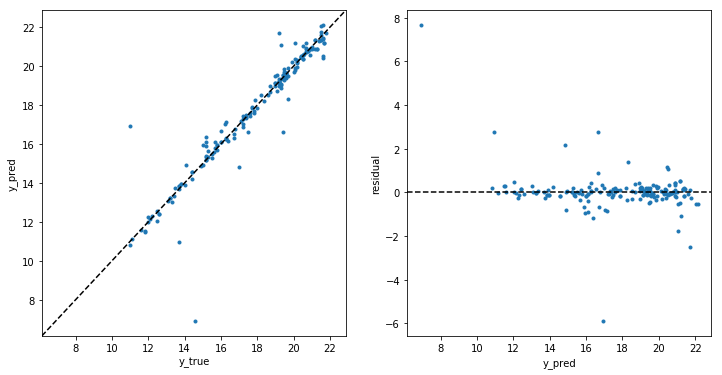

In [118]:
linreg_estimator = make_pipeline(StandardScaler(), 
                                 LinearRegression())

linreg_estimator = run_model(linreg_estimator, X_train, 
                             protein_train, params=None, cv=k10)

#### PLS

In [93]:
pls_estimator = make_pipeline(std, PLSRegression())

params_pls = {
    'plsregression__n_components': list(range(2, 20)),
    'plsregression__scale': [True, False]
}

Fitting 50 folds for each of 36 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 848 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   10.9s finished


best rmse: 0.685
the best params: 
{'plsregression__scale': False, 'plsregression__n_components': 15}


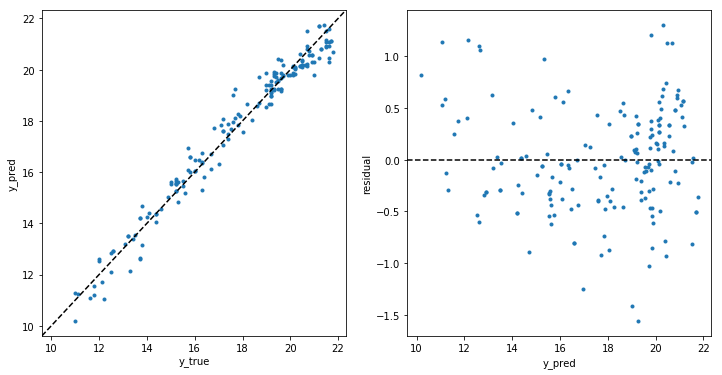

In [95]:
pls_grid = run_model(pls_estimator, X_train, protein_train, params_pls, cv=k10)

 #### PCR

In [103]:
pcr_estimator = make_pipeline(StandardScaler(), 
                              PCA(), 
                              LinearRegression())

pcr_params = {
    'pca__n_components': np.arange(2, 22)
}

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 620 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.7s finished


best rmse: 0.683
the best params: 
{'pca__n_components': 20}


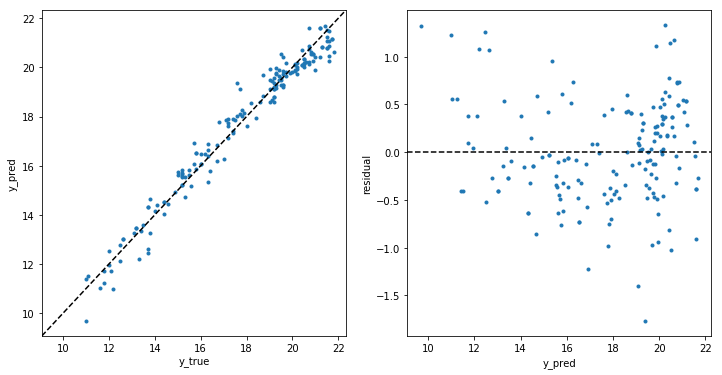

In [104]:
pcr_grid = run_model(pcr_estimator, X_train, protein_train, pcr_params, cv=k10)

#### Ridge

In [137]:
ridge_estimator = make_pipeline(StandardScaler(), Ridge())

ridge_params = {
    'ridge__alpha': np.logspace(np.log2(.00001), np.log2(.0001), num=20, base=2),
    'ridge__normalize': [True, False]
}

Fitting 50 folds for each of 40 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 756 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    5.5s finished


best rmse: 0.655
the best params: 
{'ridge__normalize': False, 'ridge__alpha': 3.359818286283782e-05}


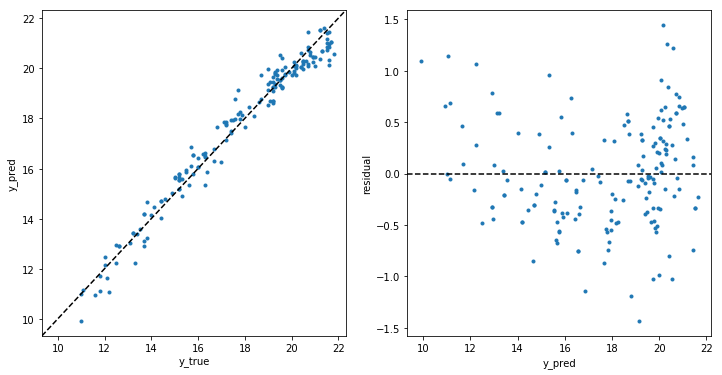

In [138]:
ridge_grid = run_model(ridge_estimator, X_train, protein_train, ridge_params, cv=k10)

#### Lasso

In [145]:
lasso_estimator = make_pipeline(StandardScaler(), 
                                Lasso())

lasso_params = {
    'lasso__alpha': np.logspace(np.log2(.005), np.log2(.1), num=20, base=2),
    'lasso__normalize': [True, False]
}

Fitting 50 folds for each of 40 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  43 tasks      | elapsed:   25.7s
[Parallel(n_jobs=4)]: Done 1487 tasks      | elapsed:   36.4s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   38.9s finished
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best rmse: 1.289
the best params: 
{'lasso__alpha': 0.008024090035856699, 'lasso__normalize': False}


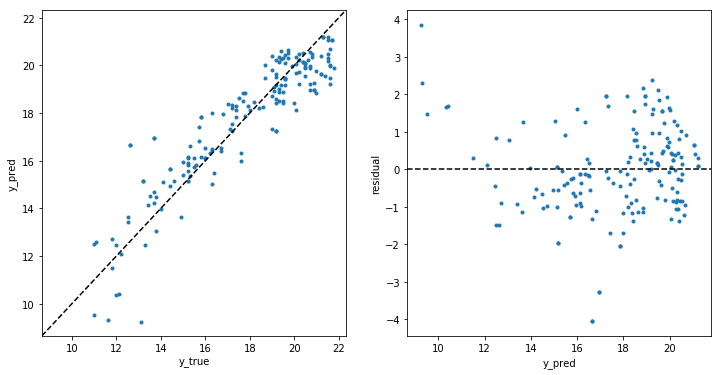

In [146]:
lasso_grid = run_model(lasso_estimator, X_train, protein_train, lasso_params, cv=k10)

#### ElasticNet

In [168]:
elastic_estimator = make_pipeline(StandardScaler(), ElasticNet())

elastic_params = {
    'elasticnet__alpha': np.logspace(np.log10(.005), np.log10(.05), base=10, num=10),
    'elasticnet__l1_ratio': np.linspace(0.1,.9, 7)
}

In [170]:
elastic_params

{'elasticnet__alpha': array([0.005     , 0.00645775, 0.0083405 , 0.01077217, 0.0139128 ,
        0.01796907, 0.02320794, 0.02997421, 0.03871318, 0.05      ]),
 'elasticnet__l1_ratio': array([0.1       , 0.23333333, 0.36666667, 0.5       , 0.63333333,
        0.76666667, 0.9       ])}

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 50 folds for each of 70 candidates, totalling 3500 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1112 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 2612 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done 3500 out of 3500 | elapsed:   34.1s finished
C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best rmse: 1.235
the best params: 
{'elasticnet__alpha': 0.004999999999999999, 'elasticnet__l1_ratio': 0.1}


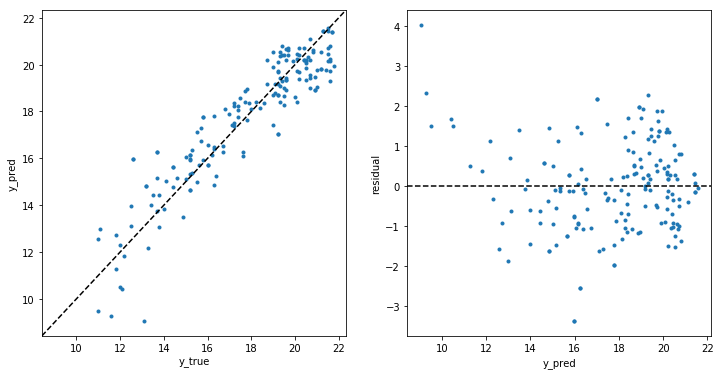

In [171]:
elastic_grid = run_model(elastic_estimator, X_train, protein_train, elastic_params, cv=k10)

#### Choosing models

In [157]:
def compare_model(estimators):
    results = {}
    for name in estimators:
        scores = cross_val_score(estimators[name], X_train, y_train, 
                                 scoring='neg_mean_squared_error', 
                                 cv=k10, n_jobs=4)
        results[name] = np.sqrt(-scores)    # to rmse
        
    # to dataframe
    results = pd.DataFrame(results)
    
    # plot boxplot
    ax = results.boxplot(figsize=(8, 5))
    ax.set_ylabel("RMSE")
    return results



In [173]:
candidates = {
    'linreg': linreg_estimator,
    'pcr': pcr_grid.best_estimator_,
    'pls': pls_grid.best_estimator_,
    'ridge': ridge_grid.best_estimator_,
    'lasso': lasso_grid.best_estimator_,
    'elasticnet': elastic_grid.best_estimator_
}

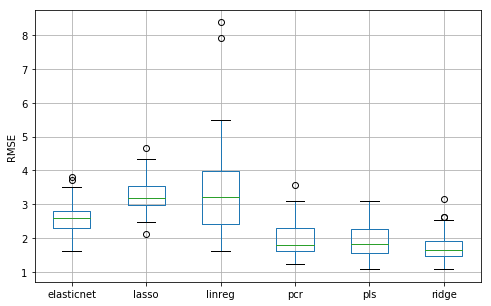

In [174]:
results = compare_model(candidates)

In [188]:
for name, scores in results.items():
    rmse = scores
    rmse_avg = rmse.median()
    sd = rmse.std()*2
    print("{}: rmse={:.3f} +/- {:.2f}".format(name, rmse_avg, sd))

elasticnet: rmse=2.600 +/- 0.86
lasso: rmse=3.198 +/- 0.98
linreg: rmse=3.205 +/- 2.77
pcr: rmse=1.793 +/- 1.05
pls: rmse=1.812 +/- 0.97
ridge: rmse=1.656 +/- 0.89


In [ ]:
# I would choose ridge regression model
# because it has the best performance in terms of RMSE
# while having low variance compare to other models

In [175]:
final_model = ridge_grid.best_estimator_
final_model.fit(X_train, protein_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=3.359818286283782e-05, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])

In [179]:
protein_test = y_test['protein'].values

In [182]:
test_pred = final_model.predict(X_test)

mse = mean_squared_error(protein_test, test_pred)
r2 = r2_score(protein_test, test_pred)

print("Final model: r^2:{:.3f}, rmse: {:.3f}".format(r2, np.sqrt(mse)))

Final model: r^2:0.945, rmse: 0.747


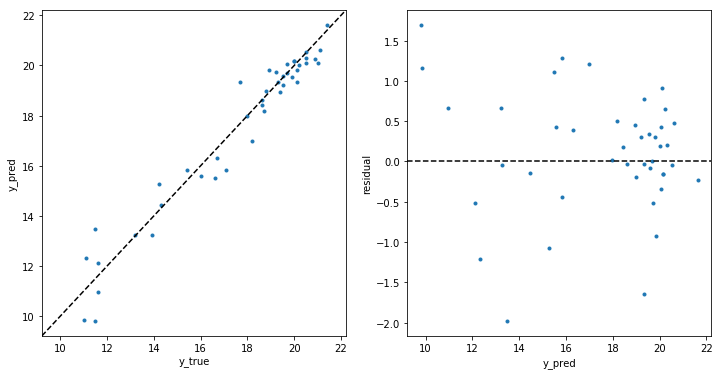

In [186]:
plot_regress(protein_test, test_pred)